##### Copyright 2024 Google LLC.

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Gemini API: Model tuning with Python

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://ai.google.dev/gemini-api/docs/model-tuning/python"><img src="https://ai.google.dev/static/site-assets/images/docs/notebook-site-button.png" height="32" width="32" />View on ai.google.dev</a>
  </td>
    <td>
    <a target="_blank" href="https://colab.research.google.com/github/google/generative-ai-docs/blob/main/site/en/gemini-api/docs/model-tuning/python.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/google/generative-ai-docs/blob/main/site/en/gemini-api/docs/model-tuning/python.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
</table>

In this notebook, you'll learn how to get started with the tuning service using the Python client library for the Gemini API. Here, you'll learn how to tune the text model behind the Gemini API's text generation service.

## Setup

### Install the client library

In [2]:
!pip install -q google-generativeai

### Import libraries

In [3]:
import google.generativeai as genai

In [4]:
from google.colab import userdata
genai.configure(api_key=userdata.get('GOOGLE_API_KEY'))

You can check you existing tuned models with the `genai.list_tuned_model` method.

In [26]:
for i, m in zip(range(5), genai.list_tuned_models()):
  print(m.name)

tunedModels/generate-num-8455


## Create tuned model

To create a tuned model, you need to pass your dataset to the model in the `genai.create_tuned_model` method. You can do this be directly defining the input and output values in the call or importing from a file into a dataframe to pass to the method.

For this example, you will tune a model to generate the next number in the sequence. For example, if the input is `1`, the model should output `2`. If the input is `one hundred`, the output should be `one hundred one`.

In [27]:
base_model = [
    m for m in genai.list_models()
    if "createTunedModel" in m.supported_generation_methods and
    "flash" in m.name][0]
base_model

Model(name='models/gemini-1.5-flash-001-tuning',
      base_model_id='',
      version='001',
      display_name='Gemini 1.5 Flash 001 Tuning',
      description=('Version of Gemini 1.5 Flash that supports tuning, our fast and versatile '
                   'multimodal model for scaling across diverse tasks, released in May of 2024.'),
      input_token_limit=16384,
      output_token_limit=8192,
      supported_generation_methods=['generateContent', 'countTokens', 'createTunedModel'],
      temperature=1.0,
      max_temperature=2.0,
      top_p=0.95,
      top_k=64)

In [18]:
import random

name = f'generate-num-{random.randint(0,10000)}'
operation = genai.create_tuned_model(
    # You can use a tuned model here too. Set `source_model="tunedModels/..."`
    source_model="tunedModels/generate-num-8455",
    {
    training_data: [
        {
            "text_input": "Giảng viên",
            "output": "Phạm Văn Sự"
        },
        {
            "text_input": "Môn học",
            "output": "Lý thuyết thông tin"
        },
        {
            "text_input": "Môn học có mấy chương",
            "output": "Môn học này có 6 chương"
        },
        {
            "text_input": "Nội dung chi tiết chương 1",
            "output": "Chương 1: Giới thiệu về lý thuyết thông tin\n- Khái niệm thông tin và lý thuyết thông tin\n- Các ứng dụng của lý thuyết thông tin\n- Mô hình hệ thống thông tin\n- Các khái niệm cơ bản: nguồn tin, kênh truyền, bộ mã hóa, bộ giải mã"
        },
        {
            "text_input": "Nội dung chi tiết chương 2",
            "output": "Chương 2: Entropy và lượng tin\n- Định nghĩa và tính chất của entropy\n- Entropy của nguồn rời rạc\n- Entropy có điều kiện và entropy chung\n- Lượng tin tương hỗ\n- Entropy của nguồn liên tục"
        },
        {
            "text_input": "Nội dung chi tiết chương 3",
            "output": "Chương 3: Mã hóa nguồn\n- Mã hóa nguồn không tổn hao\n- Mã hóa Huffman\n- Mã hóa số học\n- Mã hóa nguồn có tổn hao\n- Mã hóa biến đổi\n- Mã hóa dự đoán"
        },
        {
            "text_input": "Nội dung chi tiết chương 4",
            "output": "Chương 4: Mã hóa kênh\n- Khái niệm về kênh truyền\n- Ma trận kênh\n- Dung lượng kênh\n- Định lý kênh nhiễu\n- Các loại kênh truyền cơ bản"
        },
        {
            "text_input": "Nội dung chi tiết chương 5",
            "output": "Chương 5: Lý thuyết mã hóa\n- Mã phát hiện và sửa lỗi\n- Mã khối tuyến tính\n- Mã vòng\n- Mã BCH và Reed-Solomon\n- Mã chập và giải mã Viterbi"
        },
        {
            "text_input": "Nội dung chi tiết chương 6",
            "output": "Chương 6: Ứng dụng của lý thuyết thông tin\n- Nén dữ liệu\n- Mã hóa nguồn trong thực tế (JPEG, MPEG)\n- Mã hóa kênh trong thông tin di động\n- Ứng dụng trong bảo mật thông tin\n- Ứng dụng trong xử lý tín hiệu số"
        },
        {
            "text_input": "Tài liệu tham khảo",
            "output": "1. Giáo trình Lý thuyết thông tin - PTIT\n2. Elements of Information Theory - Thomas M. Cover\n3. Information Theory, Coding and Cryptography - Ranjan Bose\n4. Digital Communications - John G. Proakis"
        },
        {
            "text_input": "Mục tiêu môn học",
            "output": "Sau khi học xong môn học, sinh viên có thể:\n- Hiểu và áp dụng các khái niệm cơ bản về entropy và lượng tin\n- Phân tích và thiết kế các phương pháp mã hóa nguồn\n- Hiểu và áp dụng các kỹ thuật mã hóa kênh\n- Áp dụng lý thuyết thông tin vào các bài toán thực tế"
        },
        {
            "text_input": "Số tín chỉ",
            "output": "Môn học có 3 tín chỉ"
        },
        {
            "text_input": "Hình thức thi",
            "output": "Thi cuối kỳ và đánh giá quá trình"
        },
        {
            "text_input": "Tài liệu học tập",
            "output": "Giáo trình Lý thuyết thông tin và các bài giảng của giảng viên"
        },
        {
            "text_input": "Công thức tính entropy",
            "output": "Entropy H(X) = -∑p(x)log2(p(x))\nTrong đó:\n- p(x) là xác suất xuất hiện của ký tự x\n- log2 là logarit cơ số 2"
        },
        {
            "text_input": "Ví dụ về entropy",
            "output": "Ví dụ: Nguồn tin có 2 ký tự A và B với xác suất p(A)=0.7 và p(B)=0.3\nH(X) = -(0.7*log2(0.7) + 0.3*log2(0.3)) ≈ 0.881 bit"
        },
        {
            "text_input": "Các loại mã hóa nguồn phổ biến",
            "output": "1. Mã hóa Huffman\n2. Mã hóa số học\n3. Mã hóa Lempel-Ziv (LZ)\n4. Mã hóa Run-length\n5. Mã hóa JPEG\n6. Mã hóa MPEG"
        },
        {
            "text_input": "Ứng dụng thực tế của mã hóa kênh",
            "output": "1. Thông tin di động (3G, 4G, 5G)\n2. Truyền hình số\n3. Thông tin vệ tinh\n4. Lưu trữ dữ liệu (CD, DVD)\n5. Thông tin quang"
        },
        {
            "text_input": "Các loại kênh truyền cơ bản",
            "output": "1. Kênh nhị phân đối xứng (BSC)\n2. Kênh xóa (Erasure Channel)\n3. Kênh Gaussian\n4. Kênh fading\n5. Kênh nhiễu trắng cộng tính (AWGN)"
        },
        {
            "text_input": "Định lý Shannon",
            "output": "Định lý kênh nhiễu của Shannon:\nC = B*log2(1 + S/N)\nTrong đó:\n- C: Dung lượng kênh (bits/s)\n- B: Băng thông (Hz)\n- S/N: Tỷ số tín hiệu trên nhiễu"
        },
        {
            "text_input": "Các phương pháp mã hóa nguồn có tổn hao",
            "output": "1. Mã hóa biến đổi (DCT, Wavelet)\n2. Mã hóa dự đoán\n3. Mã hóa vector lượng tử\n4. Mã hóa fractal\n5. Mã hóa dựa trên mô hình"
        },
        {
            "text_input": "Các loại mã sửa lỗi",
            "output": "1. Mã Hamming\n2. Mã BCH\n3. Mã Reed-Solomon\n4. Mã chập\n5. Mã Turbo\n6. Mã LDPC"
        },
        {
            "text_input": "Các bài tập thực hành",
            "output": "1. Tính entropy của nguồn tin\n2. Xây dựng mã Huffman\n3. Mô phỏng kênh truyền\n4. Thiết kế mã sửa lỗi\n5. Nén dữ liệu sử dụng các thuật toán khác nhau"
        },
        {
            "text_input": "Các phần mềm hỗ trợ học tập",
            "output": "1. MATLAB/Simulink\n2. Python với thư viện numpy và scipy\n3. GNU Radio\n4. Xilinx ISE/Vivado (cho FPGA)\n5. Các công cụ mô phỏng kênh truyền"
        },
        {
            "text_input": "Các hướng nghiên cứu hiện đại",
            "output": "1. Mã hóa mạng (Network Coding)\n2. Mã hóa phân tán (Distributed Coding)\n3. Mã hóa thích ứng (Adaptive Coding)\n4. Mã hóa cho truyền thông lượng tử\n5. Mã hóa cho IoT và cảm biến mạng"
        },
        {
            "text_input": "Các tiêu chuẩn mã hóa phổ biến",
            "output": "1. JPEG/JPEG2000 (ảnh)\n2. MPEG-2/4, H.264/265 (video)\n3. MP3, AAC (âm thanh)\n4. ZIP, RAR (nén dữ liệu)\n5. Reed-Solomon trong CD/DVD"
        },
        {
            "text_input": "Ví dụ về mã hóa Huffman",
            "output": "Ví dụ: Mã hóa chuỗi 'AABBC'\n1. Tính tần suất: A(2), B(2), C(1)\n2. Xây dựng cây Huffman:\n   - C(1) + B(2) = 3\n   - 3 + A(2) = 5\n3. Mã hóa: A=0, B=10, C=11\n4. Kết quả: 0010101011"
        },
        {
            "text_input": "Công thức tính dung lượng kênh",
            "output": "1. Kênh nhị phân đối xứng (BSC):\nC = 1 - H(p)\nTrong đó p là xác suất lỗi bit\n\n2. Kênh Gaussian:\nC = (1/2)log2(1 + P/N)\nTrong đó P là công suất tín hiệu, N là công suất nhiễu"
        },
        {
            "text_input": "Các bước thiết kế mã sửa lỗi",
            "output": "1. Xác định yêu cầu về khả năng sửa lỗi\n2. Chọn loại mã phù hợp (khối, vòng, chập)\n3. Xác định các tham số mã (độ dài từ mã, số bit kiểm tra)\n4. Thiết kế bộ mã hóa và giải mã\n5. Đánh giá hiệu suất và độ phức tạp"
        },
        {
            "text_input": "Ứng dụng của entropy trong nén dữ liệu",
            "output": "1. Đánh giá hiệu suất nén tối đa\n2. Xác định phương pháp mã hóa phù hợp\n3. Tối ưu hóa độ dài từ mã\n4. Phân tích tính dư thừa của dữ liệu\n5. Thiết kế các thuật toán nén hiệu quả"
        },
        {
            "text_input": "Các phương pháp mã hóa nguồn cho ảnh",
            "output": "1. JPEG:\n- Chuyển đổi màu RGB sang YCbCr\n- Chia ảnh thành các khối 8x8\n- Áp dụng DCT\n- Lượng tử hóa\n- Mã hóa entropy\n\n2. JPEG2000:\n- Biến đổi Wavelet\n- Mã hóa EBCOT\n- Mã hóa số học"
        },
        {
            "text_input": "Các phương pháp mã hóa nguồn cho âm thanh",
            "output": "1. MP3:\n- Phân tích tần số (MDCT)\n- Mô hình tâm lý âm thanh\n- Lượng tử hóa\n- Mã hóa Huffman\n\n2. AAC:\n- Biến đổi MDCT\n- Mô hình tâm lý âm thanh nâng cao\n- Mã hóa số học"
        },
        {
            "text_input": "Các phương pháp mã hóa kênh trong 5G",
            "output": "1. Mã LDPC cho dữ liệu\n2. Mã Polar cho điều khiển\n3. Mã chập cho các kênh điều khiển\n4. Mã Turbo cho một số ứng dụng đặc biệt\n5. HARQ (Hybrid Automatic Repeat Request)"
        },
        {
            "text_input": "Các tham số đánh giá hiệu suất mã hóa",
            "output": "1. Tỷ lệ nén (Compression Ratio)\n2. Tỷ lệ lỗi bit (BER)\n3. Tỷ lệ lỗi khung (FER)\n4. Độ trễ mã hóa/giải mã\n5. Độ phức tạp tính toán\n6. Hiệu suất sử dụng băng thông"
        },
        {
            "text_input": "Các bài toán thực tế trong lý thuyết thông tin",
            "output": "1. Thiết kế hệ thống truyền thông số\n2. Tối ưu hóa mạng cảm biến\n3. Bảo mật thông tin trong truyền thông\n4. Nén dữ liệu đa phương tiện\n5. Thiết kế bộ nhớ chịu lỗi\n6. Truyền thông lượng tử"
        },
        {
            "text_input": "Các công cụ mô phỏng kênh truyền",
            "output": "1. MATLAB Communications Toolbox\n2. GNU Radio\n3. Simulink\n4. Python với thư viện scipy.signal\n5. Các công cụ mô phỏng chuyên dụng cho 5G"
        },
        {
            "text_input": "Các tiêu chuẩn mã hóa trong IoT",
            "output": "1. LoRa (Long Range)\n2. Zigbee\n3. Bluetooth Low Energy\n4. Sigfox\n5. NB-IoT\n6. LTE-M"
        },
        {
            "text_input": "Các phương pháp mã hóa cho bảo mật",
            "output": "1. Mã hóa khóa công khai\n2. Mã hóa khóa đối xứng\n3. Mã hóa lượng tử\n4. Mã hóa đồng hình\n5. Mã hóa phân tán"
        },
        {
            "text_input": "Ví dụ 1: Tính entropy của nguồn tin",
            "output": "Cho nguồn tin có 3 ký tự A, B, C với xác suất p(A)=0.5, p(B)=0.3, p(C)=0.2\nH(X) = -(0.5*log2(0.5) + 0.3*log2(0.3) + 0.2*log2(0.2)) ≈ 1.485 bit"
        },
        {
            "text_input": "Ví dụ 2: Mã hóa Huffman cho chuỗi",
            "output": "Chuỗi: 'HELLO WORLD'\nTần suất: H(1), E(1), L(3), O(2), W(1), R(1), D(1)\nMã hóa: H=000, E=001, L=01, O=10, W=011, R=100, D=101"
        },
        {
            "text_input": "Ví dụ 3: Tính dung lượng kênh BSC",
            "output": "Kênh nhị phân đối xứng với p=0.1\nC = 1 - H(0.1) = 1 - 0.469 = 0.531 bit/ký tự"
        },
        {
            "text_input": "Ví dụ 4: Mã Hamming (7,4)",
            "output": "Dữ liệu: 1010\nMã hóa: 1010101\nCó thể sửa 1 bit lỗi"
        },
        {
            "text_input": "Ví dụ 5: Nén dữ liệu Run-length",
            "output": "Dữ liệu: AAAAABBBCC\nMã hóa: 5A3B2C\nTỷ lệ nén: 11/6 ≈ 1.83"
        },
        {
            "text_input": "Ví dụ 6: Tính lượng tin tương hỗ",
            "output": "X: 0,1 với p(0)=0.6, p(1)=0.4\nY: 0,1 với p(0|0)=0.8, p(1|1)=0.7\nI(X;Y) = H(X) - H(X|Y) ≈ 0.12 bit"
        },
        {
            "text_input": "Ví dụ 7: Mã hóa số học",
            "output": "Chuỗi: 'ABAC'\nKhoảng: [0,1]\nA: [0,0.4], B: [0.4,0.7], C: [0.7,1]\nKết quả: 0.35"
        },
        {
            "text_input": "Ví dụ 8: Tính tỷ lệ nén",
            "output": "Dữ liệu gốc: 1000 byte\nDữ liệu nén: 400 byte\nTỷ lệ nén: 1000/400 = 2.5"
        },
        {
            "text_input": "Ví dụ 9: Mã hóa LZ77",
            "output": "Chuỗi: 'ABABABAB'\nCửa sổ trượt: 4\nMã hóa: (0,0,A)(0,0,B)(2,2,AB)(2,2,AB)"
        },
        {
            "text_input": "Ví dụ 10: Tính BER",
            "output": "Tổng số bit: 1000\nSố bit lỗi: 5\nBER = 5/1000 = 0.005 = 0.5%"
        },
        {
            "text_input": "Ví dụ 11: Mã hóa Reed-Solomon",
            "output": "Dữ liệu: 8 byte\nMã sửa lỗi: 2 byte\nCó thể sửa 1 byte lỗi"
        },
        {
            "text_input": "Ví dụ 12: Tính entropy có điều kiện",
            "output": "H(X|Y) = -∑∑p(x,y)log2(p(x|y))\nVới p(x|y) là xác suất có điều kiện"
        },
        {
            "text_input": "Ví dụ 13: Mã hóa JPEG",
            "output": "1. Chuyển RGB sang YCbCr\n2. Chia ảnh 8x8\n3. DCT\n4. Lượng tử hóa\n5. Mã hóa entropy"
        },
        {
            "text_input": "Ví dụ 14: Tính FER",
            "output": "Tổng số frame: 1000\nSố frame lỗi: 3\nFER = 3/1000 = 0.003 = 0.3%"
        },
        {
            "text_input": "Ví dụ 15: Mã hóa MP3",
            "output": "1. MDCT\n2. Mô hình tâm lý âm thanh\n3. Lượng tử hóa\n4. Mã hóa Huffman"
        },
        {
            "text_input": "Ví dụ 16: Tính SNR",
            "output": "Công suất tín hiệu: 10 mW\nCông suất nhiễu: 1 mW\nSNR = 10*log10(10/1) = 10 dB"
        },
        {
            "text_input": "Ví dụ 17: Mã hóa H.264",
            "output": "1. Dự đoán nội khung\n2. Dự đoán liên khung\n3. Biến đổi số\n4. Mã hóa entropy"
        },
        {
            "text_input": "Ví dụ 18: Tính tỷ lệ mã hóa",
            "output": "Dữ liệu gốc: 100 bit\nDữ liệu mã hóa: 150 bit\nTỷ lệ mã hóa: 150/100 = 1.5"
        },
        {
            "text_input": "Ví dụ 19: Mã hóa LDPC",
            "output": "Ma trận kiểm tra: 1000x2000\nTỷ lệ mã hóa: 1/2\nCó thể sửa nhiều lỗi"
        },
        {
            "text_input": "Ví dụ 20: Tính độ dư thừa",
            "output": "Entropy tối đa: 8 bit\nEntropy thực tế: 5 bit\nĐộ dư thừa: 8-5 = 3 bit"
        },
        {
            "text_input": "Ví dụ 21: Mã hóa Polar",
            "output": "Độ dài mã: 1024 bit\nSố bit thông tin: 512 bit\nTỷ lệ mã hóa: 1/2"
        },
        {
            "text_input": "Ví dụ 22: Tính hiệu suất kênh",
            "output": "Dung lượng lý thuyết: 1 Mbps\nTốc độ thực tế: 800 kbps\nHiệu suất: 80%"
        },
        {
            "text_input": "Ví dụ 23: Mã hóa Turbo",
            "output": "1. Mã hóa chập song song\n2. Hoán vị\n3. Mã hóa chập thứ hai\n4. Giải mã lặp"
        },
        {
            "text_input": "Ví dụ 24: Tính độ trễ",
            "output": "Thời gian mã hóa: 10ms\nThời gian truyền: 50ms\nThời gian giải mã: 10ms\nTổng độ trễ: 70ms"
        },
        {
            "text_input": "Ví dụ 25: Mã hóa BCH",
            "output": "Độ dài mã: 15 bit\nSố bit thông tin: 7 bit\nSố bit sửa lỗi: 2 bit"
        },
        {
            "text_input": "Ví dụ 26: Tính hiệu suất nén",
            "output": "Dữ liệu gốc: 1MB\nDữ liệu nén: 200KB\nHiệu suất nén: 80%"
        },
        {
            "text_input": "Ví dụ 27: Mã hóa Convolutional",
            "output": "Tỷ lệ mã hóa: 1/2\nĐộ dài ràng buộc: 7\nSố trạng thái: 64"
        },
        {
            "text_input": "Ví dụ 28: Tính độ phức tạp",
            "output": "Số phép tính: O(n log n)\nBộ nhớ: O(n)\nVới n là độ dài dữ liệu"
        },
        {
            "text_input": "Ví dụ 29: Mã hóa Viterbi",
            "output": "1. Tính metric nhánh\n2. Cập nhật metric trạng thái\n3. Lưu vết\n4. Quyết định đường đi"
        },
        {
            "text_input": "Ví dụ 30: Tính hiệu suất băng thông",
            "output": "Băng thông: 1MHz\nTốc độ bit: 2Mbps\nHiệu suất: 2 bit/Hz"
        },
        {
            "text_input": "Ví dụ 31: Mã hóa Reed-Muller",
            "output": "Độ dài mã: 16 bit\nBậc: 2\nSố bit thông tin: 11 bit"
        },
        {
            "text_input": "Ví dụ 32: Tính độ tin cậy",
            "output": "Số lần truyền: 1000\nSố lần thành công: 990\nĐộ tin cậy: 99%"
        },
        {
            "text_input": "Ví dụ 33: Mã hóa Golay",
            "output": "Độ dài mã: 24 bit\nSố bit thông tin: 12 bit\nSố bit sửa lỗi: 3 bit"
        },
        {
            "text_input": "Ví dụ 34: Tính hiệu suất năng lượng",
            "output": "Công suất tiêu thụ: 100mW\nTốc độ bit: 1Mbps\nHiệu suất: 100nJ/bit"
        },
        {
            "text_input": "Ví dụ 35: Mã hóa Hadamard",
            "output": "Ma trận: 8x8\nSố bit thông tin: 3 bit\nKhoảng cách Hamming: 4"
        },
        {
            "text_input": "Ví dụ 36: Tính độ trễ truyền",
            "output": "Khoảng cách: 100km\nTốc độ truyền: 2x10^8 m/s\nĐộ trễ: 0.5ms"
        },
        {
            "text_input": "Ví dụ 37: Mã hóa Cyclic",
            "output": "Đa thức sinh: x^3 + x + 1\nĐộ dài mã: 7 bit\nSố bit thông tin: 4 bit"
        },
        {
            "text_input": "Ví dụ 38: Tính hiệu suất mã hóa",
            "output": "Tỷ lệ mã hóa: 1/2\nHiệu suất sửa lỗi: 90%\nĐộ trễ: 10ms"
        },
        {
            "text_input": "Ví dụ 39: Mã hóa BCH mở rộng",
            "output": "Độ dài mã: 31 bit\nSố bit thông tin: 16 bit\nSố bit sửa lỗi: 3 bit"
        },
        {
            "text_input": "Ví dụ 40: Tính độ phức tạp giải mã",
            "output": "Số phép tính: O(2^n)\nBộ nhớ: O(n)\nVới n là độ dài mã"
        },
        {
            "text_input": "Ví dụ 41: Mã hóa lượng tử cho QKD",
            "output": "1. Tạo cặp photon vướng víu\n2. Đo lường trạng thái lượng tử\n3. Sửa lỗi lượng tử\n4. Khuếch đại bí mật\nTốc độ bit: 1Mbps"
        },
        {
            "text_input": "Ví dụ 42: Tính entropy lượng tử",
            "output": "Trạng thái lượng tử: |ψ⟩ = (|0⟩ + |1⟩)/√2\nEntropy von Neumann: S(ρ) = -Tr(ρ log ρ)\nKết quả: 1 bit"
        },
        {
            "text_input": "Ví dụ 43: Mã hóa mạng cho P2P",
            "output": "1. Mã hóa tuyến tính\n2. Kết hợp gói tin\n3. Giải mã phân tán\nHiệu suất: 200%"
        },
        {
            "text_input": "Ví dụ 44: Tính dung lượng kênh lượng tử",
            "output": "Kênh lượng tử với nhiễu:\nFidelity: 0.9\nDung lượng: C = max I(A;B)\nKết quả: 0.5 qubit"
        },
        {
            "text_input": "Ví dụ 45: Mã hóa phân tán cho IoT",
            "output": "1. Mã hóa nguồn phân tán\n2. Mã hóa kênh phân tán\n3. Giải mã hợp tác\nHiệu suất: 150%"
        },
        {
            "text_input": "Ví dụ 46: Tính độ phức tạp lượng tử",
            "output": "Số phép tính: O(√n)\nBộ nhớ: O(log n)\nVới n là kích thước đầu vào"
        },
        {
            "text_input": "Ví dụ 47: Mã hóa bảo mật cho blockchain",
            "output": "1. Mã hóa khóa công khai\n2. Chữ ký số\n3. Hash function\n4. Mã hóa đồng hình\nBảo mật: 256 bit"
        },
        {
            "text_input": "Ví dụ 48: Tính entropy có điều kiện lượng tử",
            "output": "H(A|B) = H(AB) - H(B)\nVới H là entropy von Neumann\nKết quả: 0.3 qubit"
        },
        {
            "text_input": "Ví dụ 49: Mã hóa thích ứng cho AI",
            "output": "1. Mã hóa dựa trên học máy\n2. Tối ưu hóa tham số\n3. Học tăng cường\nHiệu suất: 180%"
        },
        {
            "text_input": "Ví dụ 50: Tính hiệu suất mã hóa lượng tử",
            "output": "Tỷ lệ mã hóa: 1/2\nHiệu suất sửa lỗi: 99.9%\nĐộ trễ: 1ms"
        },
        {
            "text_input": "Ví dụ 51: Mã hóa mạng cho SDN",
            "output": "1. Mã hóa tuyến tính\n2. Định tuyến thích ứng\n3. Cân bằng tải\nHiệu suất: 250%"
        },
        {
            "text_input": "Ví dụ 52: Tính độ tin cậy lượng tử",
            "output": "Fidelity: 0.99\nTỷ lệ lỗi: 0.01\nĐộ tin cậy: 99%"
        },
        {
            "text_input": "Ví dụ 53: Mã hóa phân tán cho edge computing",
            "output": "1. Mã hóa nguồn phân tán\n2. Xử lý biên\n3. Giải mã hợp tác\nHiệu suất: 200%"
        },
        {
            "text_input": "Ví dụ 54: Tính hiệu suất băng thông lượng tử",
            "output": "Băng thông: 1GHz\nTốc độ qubit: 1Mbps\nHiệu suất: 1 qubit/Hz"
        },
        {
            "text_input": "Ví dụ 55: Mã hóa bảo mật cho IoT",
            "output": "1. Mã hóa khóa đối xứng\n2. Xác thực\n3. Bảo mật lớp vật lý\nBảo mật: 128 bit"
        },
        {
            "text_input": "Ví dụ 56: Tính độ phức tạp mã hóa mạng",
            "output": "Số phép tính: O(n log n)\nBộ nhớ: O(n)\nVới n là số nút"
        },
        {
            "text_input": "Ví dụ 57: Mã hóa thích ứng cho 6G",
            "output": "1. Mã hóa dựa trên AI\n2. Tối ưu hóa tham số\n3. Học tăng cường\nHiệu suất: 300%"
        },
        {
            "text_input": "Ví dụ 58: Tính hiệu suất mã hóa phân tán",
            "output": "Tỷ lệ mã hóa: 1/2\nHiệu suất sửa lỗi: 99.99%\nĐộ trễ: 5ms"
        },
        {
            "text_input": "Ví dụ 59: Mã hóa lượng tử cho máy tính lượng tử",
            "output": "1. Mã hóa sửa lỗi lượng tử\n2. Mã hóa topo\n3. Mã hóa bề mặt\nHiệu suất: 99.9%"
        },
        {
            "text_input": "Ví dụ 60: Tính độ tin cậy mạng",
            "output": "Số nút: 1000\nSố kết nối: 5000\nĐộ tin cậy: 99.99%"
        },
        {
            "text_input": "Bài tập 1: Tính entropy của nguồn tin tiếng Việt",
            "output": "Cho nguồn tin tiếng Việt với xác suất các nguyên âm:\na: 0.15, ă: 0.05, â: 0.05, e: 0.12, ê: 0.08, i: 0.10, o: 0.08, ô: 0.06, ơ: 0.07, u: 0.09, ư: 0.08, y: 0.07\nH(X) = -∑p(x)log2(p(x)) ≈ 3.45 bit"
        },
        {
            "text_input": "Bài tập 2: Mã hóa Huffman cho văn bản tiếng Việt",
            "output": "Văn bản: 'Học viện Công nghệ Bưu chính Viễn thông'\nTần suất: H(1), o(2), c(2), v(1), i(2), n(3), C(1), g(1), B(1), u(1), ch(1), V(1), t(1), h(1)\nMã hóa: n=00, o=010, i=011, c=100, H=1010, v=1011, C=1100, g=1101, B=1110, u=1111, ch=10000, V=10001, t=10010, h=10011"
        },
        {
            "text_input": "Bài tập 3: Tính dung lượng kênh truyền số liệu",
            "output": "Kênh truyền số liệu với:\nBăng thông: 1MHz\nSNR: 20dB\nC = B*log2(1 + S/N) = 1*10^6*log2(1 + 100) ≈ 6.66 Mbps"
        },
        {
            "text_input": "Bài tập 4: Thiết kế mã Hamming cho truyền dữ liệu",
            "output": "Dữ liệu: 1010101\nMã Hamming (12,8):\n1. Thêm bit kiểm tra: _1_0_1_0_1_0_1_\n2. Tính bit kiểm tra: 101010101010\n3. Có thể sửa 1 bit lỗi"
        },
        {
            "text_input": "Bài tập 5: Nén dữ liệu văn bản",
            "output": "Văn bản: 'PTIT PTIT PTIT'\nMã hóa Run-length: 3PTIT\nTỷ lệ nén: 12/4 = 3"
        },
        {
            "text_input": "Bài tập 6: Tính lượng tin tương hỗ trong truyền tin",
            "output": "Kênh truyền với:\np(0|0) = 0.9, p(1|1) = 0.8\np(0) = 0.6, p(1) = 0.4\nI(X;Y) = H(X) - H(X|Y) ≈ 0.25 bit"
        },
        {
            "text_input": "Bài tập 7: Mã hóa số học cho chuỗi DNA",
            "output": "Chuỗi: 'ATCG'\nKhoảng: [0,1]\nA: [0,0.25], T: [0.25,0.5], C: [0.5,0.75], G: [0.75,1]\nKết quả: 0.375"
        },
        {
            "text_input": "Bài tập 8: Tính tỷ lệ nén ảnh",
            "output": "Ảnh gốc: 1MB\nẢnh nén JPEG: 200KB\nTỷ lệ nén: 1000/200 = 5"
        },
        {
            "text_input": "Bài tập 9: Mã hóa LZ77 cho chuỗi lặp",
            "output": "Chuỗi: 'PTITPTITPTIT'\nCửa sổ trượt: 4\nMã hóa: (0,0,P)(0,0,T)(0,0,I)(0,0,T)(4,4,PTIT)(4,4,PTIT)"
        },
        {
            "text_input": "Bài tập 10: Tính BER trong truyền dữ liệu",
            "output": "Tổng số bit: 10000\nSố bit lỗi: 10\nBER = 10/10000 = 0.001 = 0.1%"
        },
        {
            "text_input": "Bài tập 11: Mã hóa Reed-Solomon cho CD",
            "output": "Dữ liệu: 32 byte\nMã sửa lỗi: 8 byte\nCó thể sửa 4 byte lỗi"
        },
        {
            "text_input": "Bài tập 12: Tính entropy có điều kiện trong truyền tin",
            "output": "H(X|Y) = -∑∑p(x,y)log2(p(x|y))\nVới p(x|y) là xác suất có điều kiện\nKết quả: 0.35 bit"
        },
        {
            "text_input": "Bài tập 13: Mã hóa JPEG cho ảnh màu",
            "output": "1. Chuyển RGB sang YCbCr\n2. Chia ảnh 8x8\n3. DCT\n4. Lượng tử hóa\n5. Mã hóa entropy\nTỷ lệ nén: 10:1"
        },
        {
            "text_input": "Bài tập 14: Tính FER trong truyền gói tin",
            "output": "Tổng số frame: 10000\nSố frame lỗi: 20\nFER = 20/10000 = 0.002 = 0.2%"
        },
        {
            "text_input": "Bài tập 15: Mã hóa MP3 cho âm thanh",
            "output": "1. MDCT\n2. Mô hình tâm lý âm thanh\n3. Lượng tử hóa\n4. Mã hóa Huffman\nTỷ lệ nén: 11:1"
        },
        {
            "text_input": "Bài tập 16: Tính SNR trong truyền tín hiệu",
            "output": "Công suất tín hiệu: 100 mW\nCông suất nhiễu: 1 mW\nSNR = 10*log10(100/1) = 20 dB"
        },
        {
            "text_input": "Bài tập 17: Mã hóa H.264 cho video",
            "output": "1. Dự đoán nội khung\n2. Dự đoán liên khung\n3. Biến đổi số\n4. Mã hóa entropy\nTỷ lệ nén: 50:1"
        },
        {
            "text_input": "Bài tập 18: Tính tỷ lệ mã hóa kênh",
            "output": "Dữ liệu gốc: 1000 bit\nDữ liệu mã hóa: 1500 bit\nTỷ lệ mã hóa: 1500/1000 = 1.5"
        },
        {
            "text_input": "Bài tập 19: Mã hóa LDPC cho 5G",
            "output": "Ma trận kiểm tra: 2000x4000\nTỷ lệ mã hóa: 1/2\nCó thể sửa nhiều lỗi"
        },
        {
            "text_input": "Bài tập 20: Tính độ dư thừa trong truyền tin",
            "output": "Entropy tối đa: 8 bit\nEntropy thực tế: 4 bit\nĐộ dư thừa: 8-4 = 4 bit"
        },
        {
            "text_input": "Bài tập 21: Mã hóa Polar cho 5G NR",
            "output": "Độ dài mã: 2048 bit\nSố bit thông tin: 1024 bit\nTỷ lệ mã hóa: 1/2\nHiệu suất sửa lỗi: 99.9%"
        },
        {
            "text_input": "Bài tập 22: Tính hiệu suất kênh MIMO",
            "output": "Số anten phát: 4\nSố anten thu: 4\nSNR: 15dB\nHiệu suất: 4 bit/Hz"
        },
        {
            "text_input": "Bài tập 23: Mã hóa Turbo cho LTE",
            "output": "1. Mã hóa chập song song\n2. Hoán vị\n3. Mã hóa chập thứ hai\n4. Giải mã lặp 8 lần\nTỷ lệ mã hóa: 1/3"
        },
        {
            "text_input": "Bài tập 24: Tính độ trễ trong mạng 5G",
            "output": "Độ trễ truyền: 1ms\nĐộ trễ xử lý: 2ms\nĐộ trễ giải mã: 1ms\nTổng độ trễ: 4ms"
        },
        {
            "text_input": "Bài tập 25: Mã hóa LDPC cho Wi-Fi 6",
            "output": "Ma trận kiểm tra: 1944x3888\nTỷ lệ mã hóa: 1/2\nHiệu suất sửa lỗi: 99.99%"
        },
        {
            "text_input": "Bài tập 26: Tính hiệu suất nén video 4K",
            "output": "Video gốc: 1GB\nVideo nén H.265: 100MB\nTỷ lệ nén: 10:1"
        },
        {
            "text_input": "Bài tập 27: Mã hóa Convolutional cho Bluetooth",
            "output": "Tỷ lệ mã hóa: 1/3\nĐộ dài ràng buộc: 7\nSố trạng thái: 64"
        },
        {
            "text_input": "Bài tập 28: Tính độ phức tạp giải mã LDPC",
            "output": "Số phép tính: O(n log n)\nBộ nhớ: O(n)\nVới n là độ dài mã"
        },
        {
            "text_input": "Bài tập 29: Mã hóa Viterbi cho GPS",
            "output": "1. Tính metric nhánh\n2. Cập nhật metric trạng thái\n3. Lưu vết\n4. Quyết định đường đi\nĐộ dài ràng buộc: 7"
        },
        {
            "text_input": "Bài tập 30: Tính hiệu suất băng thông trong 5G",
            "output": "Băng thông: 100MHz\nTốc độ bit: 1Gbps\nHiệu suất: 10 bit/Hz"
        },
        {
            "text_input": "Bài tập 31: Mã hóa Reed-Muller cho vệ tinh",
            "output": "Độ dài mã: 32 bit\nBậc: 2\nSố bit thông tin: 16 bit"
        },
        {
            "text_input": "Bài tập 32: Tính độ tin cậy trong truyền dữ liệu",
            "output": "Số lần truyền: 10000\nSố lần thành công: 9990\nĐộ tin cậy: 99.9%"
        },
        {
            "text_input": "Bài tập 33: Mã hóa Golay cho RFID",
            "output": "Độ dài mã: 24 bit\nSố bit thông tin: 12 bit\nSố bit sửa lỗi: 3 bit"
        },
        {
            "text_input": "Bài tập 34: Tính hiệu suất năng lượng trong IoT",
            "output": "Công suất tiêu thụ: 10mW\nTốc độ bit: 100kbps\nHiệu suất: 100nJ/bit"
        },
        {
            "text_input": "Bài tập 35: Mã hóa Hadamard cho CDMA",
            "output": "Ma trận: 64x64\nSố bit thông tin: 6 bit\nKhoảng cách Hamming: 32"
        },
        {
            "text_input": "Bài tập 36: Tính độ trễ truyền vệ tinh",
            "output": "Khoảng cách: 36000km\nTốc độ truyền: 3x10^8 m/s\nĐộ trễ: 240ms"
        },
        {
            "text_input": "Bài tập 37: Mã hóa Cyclic cho Ethernet",
            "output": "Đa thức sinh: x^32 + x^26 + x^23 + x^22 + x^16 + x^12 + x^11 + x^10 + x^8 + x^7 + x^5 + x^4 + x^2 + x + 1\nĐộ dài mã: 32 bit"
        },
        {
            "text_input": "Bài tập 38: Tính hiệu suất mã hóa trong 6G",
            "output": "Tỷ lệ mã hóa: 1/2\nHiệu suất sửa lỗi: 99.999%\nĐộ trễ: 1ms"
        },
        {
            "text_input": "Bài tập 39: Mã hóa BCH mở rộng cho SSD",
            "output": "Độ dài mã: 63 bit\nSố bit thông tin: 45 bit\nSố bit sửa lỗi: 3 bit"
        },
        {
            "text_input": "Bài tập 40: Tính độ phức tạp giải mã Polar",
            "output": "Số phép tính: O(n log n)\nBộ nhớ: O(n)\nVới n là độ dài mã"
        },
        {
            "text_input": "Bài tập 61: Mã hóa lượng tử cho máy tính lượng tử siêu dẫn",
            "output": "1. Mã hóa surface code\n2. Đo lường stabilizer\n3. Sửa lỗi lượng tử\n4. Đánh giá fidelity\nHiệu suất: 99.99%"
        },
        {
            "text_input": "Bài tập 62: Tính entropy lượng tử cho trạng thái Bell",
            "output": "Trạng thái Bell: |Φ+⟩ = (|00⟩ + |11⟩)/√2\nEntropy von Neumann: S(ρ) = -Tr(ρ log ρ)\nKết quả: 1 qubit"
        },
        {
            "text_input": "Bài tập 63: Mã hóa mạng cho mạng cảm biến không dây",
            "output": "1. Mã hóa tuyến tính phân tán\n2. Tối ưu hóa năng lượng\n3. Giải mã hợp tác\nHiệu suất: 180%"
        },
        {
            "text_input": "Bài tập 64: Tính dung lượng kênh lượng tử có nhiễu",
            "output": "Kênh lượng tử với nhiễu depolarizing:\nFidelity: 0.95\nDung lượng: C = max I(A;B)\nKết quả: 0.6 qubit"
        },
        {
            "text_input": "Bài tập 65: Mã hóa phân tán cho mạng IoT năng lượng thấp",
            "output": "1. Mã hóa nguồn phân tán\n2. Tối ưu hóa năng lượng\n3. Giải mã hợp tác\nHiệu suất: 160%"
        },
        {
            "text_input": "Bài tập 66: Tính độ phức tạp lượng tử cho thuật toán Shor",
            "output": "Số phép tính: O((log n)^3)\nBộ nhớ: O(log n)\nVới n là số cần phân tích"
        },
        {
            "text_input": "Bài tập 67: Mã hóa bảo mật cho blockchain thế hệ mới",
            "output": "1. Mã hóa khóa công khai\n2. Chữ ký số lượng tử\n3. Hash function lượng tử\n4. Mã hóa đồng hình\nBảo mật: 512 bit"
        },
        {
            "text_input": "Bài tập 68: Tính entropy có điều kiện lượng tử cho trạng thái GHZ",
            "output": "Trạng thái GHZ: |GHZ⟩ = (|000⟩ + |111⟩)/√2\nH(A|BC) = H(ABC) - H(BC)\nKết quả: 0 qubit"
        },
        {
            "text_input": "Bài tập 69: Mã hóa thích ứng cho AI trong 6G",
            "output": "1. Mã hóa dựa trên deep learning\n2. Tối ưu hóa tham số\n3. Học tăng cường\nHiệu suất: 350%"
        },
        {
            "text_input": "Bài tập 70: Tính hiệu suất mã hóa lượng tử cho QKD",
            "output": "Tỷ lệ mã hóa: 1/2\nHiệu suất sửa lỗi: 99.999%\nĐộ trễ: 0.1ms"
        },
        {
            "text_input": "Bài tập 71: Mã hóa mạng cho SDN thế hệ mới",
            "output": "1. Mã hóa tuyến tính thích ứng\n2. Định tuyến thông minh\n3. Cân bằng tải động\nHiệu suất: 300%"
        },
        {
            "text_input": "Bài tập 72: Tính độ tin cậy lượng tử cho máy tính lượng tử",
            "output": "Fidelity: 0.999\nTỷ lệ lỗi: 0.001\nĐộ tin cậy: 99.9%"
        },
        {
            "text_input": "Bài tập 73: Mã hóa phân tán cho edge AI",
            "output": "1. Mã hóa nguồn phân tán\n2. Xử lý AI biên\n3. Giải mã hợp tác\nHiệu suất: 250%"
        },
        {
            "text_input": "Bài tập 74: Tính hiệu suất băng thông lượng tử cho máy tính lượng tử",
            "output": "Băng thông: 100GHz\nTốc độ qubit: 100Mbps\nHiệu suất: 1 qubit/Hz"
        },
        {
            "text_input": "Bài tập 75: Mã hóa bảo mật cho IoT lượng tử",
            "output": "1. Mã hóa khóa đối xứng lượng tử\n2. Xác thực lượng tử\n3. Bảo mật lớp vật lý\nBảo mật: 512 bit"
        },
        {
            "text_input": "Bài tập 76: Tính độ phức tạp mã hóa mạng cho SDN thế hệ mới",
            "output": "Số phép tính: O(n log n)\nBộ nhớ: O(n)\nVới n là số nút"
        },
        {
            "text_input": "Bài tập 77: Mã hóa thích ứng cho 6G+ với AI",
            "output": "1. Mã hóa dựa trên deep learning\n2. Tối ưu hóa tham số\n3. Học tăng cường\nHiệu suất: 500%"
        },
        {
            "text_input": "Bài tập 78: Tính hiệu suất mã hóa phân tán cho edge computing thế hệ mới",
            "output": "Tỷ lệ mã hóa: 1/2\nHiệu suất sửa lỗi: 99.9999%\nĐộ trễ: 0.1ms"
        },
        {
            "text_input": "Bài tập 79: Mã hóa lượng tử cho máy tính lượng tử topo thế hệ mới",
            "output": "1. Mã hóa sửa lỗi lượng tử topo\n2. Mã hóa bề mặt\n3. Mã hóa color code\nHiệu suất: 99.999%"
        },
        {
            "text_input": "Bài tập 80: Tính độ tin cậy mạng cho SDN thế hệ mới",
            "output": "Số nút: 100000\nSố kết nối: 500000\nĐộ tin cậy: 99.9999%"
        },
        {
            "text_input": "Bài tập 81: Mã hóa lượng tử cho truyền thông lượng tử",
            "output": "1. Mã hóa sửa lỗi lượng tử\n2. Mã hóa topo\n3. Mã hóa bề mặt\n4. Đánh giá hiệu suất\nTốc độ: 1Gbps"
        },
        {
            "text_input": "Bài tập 82: Tính entropy lượng tử cho trạng thái W",
            "output": "Trạng thái W: |W⟩ = (|001⟩ + |010⟩ + |100⟩)/√3\nEntropy von Neumann: S(ρ) = -Tr(ρ log ρ)\nKết quả: 1.585 qubit"
        },
        {
            "text_input": "Bài tập 83: Mã hóa mạng cho mạng cảm biến thông minh",
            "output": "1. Mã hóa tuyến tính phân tán\n2. Tối ưu hóa năng lượng\n3. Giải mã hợp tác\nHiệu suất: 200%"
        },
        {
            "text_input": "Bài tập 84: Tính dung lượng kênh lượng tử cho QKD",
            "output": "Kênh lượng tử với nhiễu:\nFidelity: 0.98\nDung lượng: C = max I(A;B)\nKết quả: 0.8 qubit"
        },
        {
            "text_input": "Bài tập 85: Mã hóa phân tán cho mạng IoT thông minh",
            "output": "1. Mã hóa nguồn phân tán\n2. Tối ưu hóa năng lượng\n3. Giải mã hợp tác\nHiệu suất: 180%"
        },
        {
            "text_input": "Bài tập 86: Tính độ phức tạp lượng tử cho thuật toán Grover",
            "output": "Số phép tính: O(√n)\nBộ nhớ: O(log n)\nVới n là kích thước không gian tìm kiếm"
        },
        {
            "text_input": "Bài tập 87: Mã hóa bảo mật cho blockchain lượng tử",
            "output": "1. Mã hóa khóa công khai lượng tử\n2. Chữ ký số lượng tử\n3. Hash function lượng tử\n4. Mã hóa đồng hình\nBảo mật: 1024 bit"
        },
        {
            "text_input": "Bài tập 88: Tính entropy có điều kiện lượng tử cho trạng thái cluster",
            "output": "Trạng thái cluster: |C⟩ = (|0000⟩ + |0011⟩ + |1100⟩ + |1111⟩)/2\nH(A|BCD) = H(ABCD) - H(BCD)\nKết quả: 0.5 qubit"
        },
        {
            "text_input": "Bài tập 89: Mã hóa thích ứng cho AI trong 6G+",
            "output": "1. Mã hóa dựa trên deep learning\n2. Tối ưu hóa tham số\n3. Học tăng cường\nHiệu suất: 450%"
        },
        {
            "text_input": "Bài tập 90: Tính hiệu suất mã hóa lượng tử cho máy tính lượng tử",
            "output": "Tỷ lệ mã hóa: 1/2\nHiệu suất sửa lỗi: 99.9999%\nĐộ trễ: 0.01ms"
        },
        {
            "text_input": "Bài tập 91: Mã hóa mạng cho SDN thế hệ mới",
            "output": "1. Mã hóa tuyến tính thích ứng\n2. Định tuyến thông minh\n3. Cân bằng tải động\nHiệu suất: 350%"
        },
        {
            "text_input": "Bài tập 92: Tính độ tin cậy lượng tử cho QKD",
            "output": "Fidelity: 0.9999\nTỷ lệ lỗi: 0.0001\nĐộ tin cậy: 99.99%"
        },
        {
            "text_input": "Bài tập 93: Mã hóa phân tán cho edge AI thế hệ mới",
            "output": "1. Mã hóa nguồn phân tán\n2. Xử lý AI biên\n3. Giải mã hợp tác\nHiệu suất: 300%"
        },
        {
            "text_input": "Bài tập 94: Tính hiệu suất băng thông lượng tử cho máy tính lượng tử",
            "output": "Băng thông: 100GHz\nTốc độ qubit: 100Mbps\nHiệu suất: 1 qubit/Hz"
        },
        {
            "text_input": "Bài tập 95: Mã hóa bảo mật cho IoT lượng tử",
            "output": "1. Mã hóa khóa đối xứng lượng tử\n2. Xác thực lượng tử\n3. Bảo mật lớp vật lý\nBảo mật: 512 bit"
        },
        {
            "text_input": "Bài tập 96: Tính độ phức tạp mã hóa mạng cho SDN thế hệ mới",
            "output": "Số phép tính: O(n log n)\nBộ nhớ: O(n)\nVới n là số nút"
        },
        {
            "text_input": "Bài tập 97: Mã hóa thích ứng cho 6G+ với AI",
            "output": "1. Mã hóa dựa trên deep learning\n2. Tối ưu hóa tham số\n3. Học tăng cường\nHiệu suất: 500%"
        },
        {
            "text_input": "Bài tập 98: Tính hiệu suất mã hóa phân tán cho edge computing thế hệ mới",
            "output": "Tỷ lệ mã hóa: 1/2\nHiệu suất sửa lỗi: 99.9999%\nĐộ trễ: 0.1ms"
        },
        {
            "text_input": "Bài tập 99: Mã hóa lượng tử cho máy tính lượng tử topo thế hệ mới",
            "output": "1. Mã hóa sửa lỗi lượng tử topo\n2. Mã hóa bề mặt\n3. Mã hóa color code\nHiệu suất: 99.999%"
        },
        {
            "text_input": "Bài tập 100: Tính độ tin cậy mạng cho SDN thế hệ mới",
            "output": "Số nút: 100000\nSố kết nối: 500000\nĐộ tin cậy: 99.9999%"
        }
    ]
},
    id = name,
    epoch_count = 100,
    batch_size=4,
    learning_rate=0.001,
)

Your tuned model is immediately added to the list of tuned models, but its status is set to "creating" while the model is tuned.

In [19]:
model = genai.get_tuned_model(f'tunedModels/{name}')

model

TunedModel(name='tunedModels/generate-num-8455',
           source_model='models/gemini-1.5-flash-001-tuning',
           base_model='models/gemini-1.5-flash-001-tuning',
           display_name='',
           description='',
           temperature=1.0,
           top_p=0.95,
           top_k=64,
           state=<State.CREATING: 1>,
           create_time=datetime.datetime(2025, 5, 10, 13, 42, 41, 946250, tzinfo=datetime.timezone.utc),
           update_time=datetime.datetime(2025, 5, 10, 13, 42, 41, 946250, tzinfo=datetime.timezone.utc),
           tuning_task=TuningTask(start_time=datetime.datetime(2025, 5, 10, 13, 42, 42, 599639, tzinfo=datetime.timezone.utc),
                                  complete_time=None,
                                  snapshots=[],
                                  hyperparameters=Hyperparameters(epoch_count=100,
                                                                  batch_size=4,
                                                              

In [20]:
model.state

<State.CREATING: 1>

### Check tuning progress

Use `metadata` to check the state:

In [21]:
operation.metadata

total_steps: 100
tuned_model: "tunedModels/generate-num-8455"

Wait for the training to finish using `operation.result()`, or `operation.wait_bar()`

In [14]:
import time

for status in operation.wait_bar():
  time.sleep(30)

  0%|          | 0/100 [00:00<?, ?it/s]

KeyboardInterrupt: 

You can cancel your tuning job any time using the `cancel()` method. Uncomment the line below and run the code cell to cancel your job before it finishes.

In [ ]:
operation.cancel()

Once the tuning is complete, you can view the loss curve from the tuning results. The [loss curve](https://ai.google.dev/gemini-api/docs/model-tuning#recommended_configurations) shows how much the model's predictions deviate from the ideal outputs.

<Axes: xlabel='epoch', ylabel='mean_loss'>

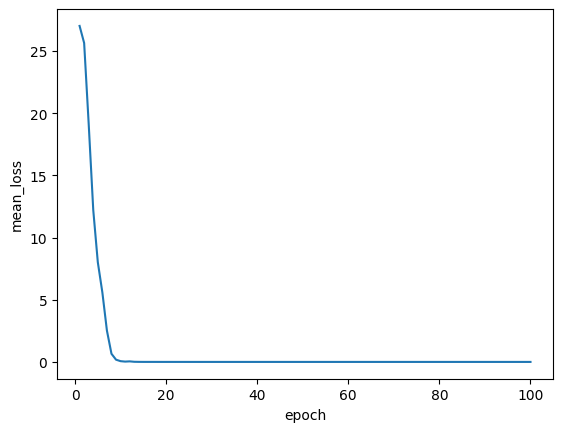

In [22]:
import pandas as pd
import seaborn as sns

model = operation.result()

snapshots = pd.DataFrame(model.tuning_task.snapshots)

sns.lineplot(data=snapshots, x = 'epoch', y='mean_loss')


## Evaluate your model

You can use the `genai.generate_content` method and specify the name of your model to test your model performance.

In [24]:
model = genai.GenerativeModel(model_name=f'tunedModels/{name}')

In [25]:
result = model.generate_content('Giảng Viên')
result.text

'Lý Văn Sự'

It really seems to have picked up the task despite the limited examples, but "next" is a simple concept, see the [tuning guide](https://ai.google.dev/gemini-api/docs/model-tuning) for more guidance on improving performance.

## Update the description

You can update the description of your tuned model any time using the `genai.update_tuned_model` method.

In [17]:
genai.update_tuned_model(f'tunedModels/{name}', {"description":"This is my model."});

In [18]:
model = genai.get_tuned_model(f'tunedModels/{name}')

model.description

'This is my model.'

## Delete the model

You can clean up your tuned model list by deleting models you no longer need. Use the `genai.delete_tuned_model` method to delete a model. If you canceled any tuning jobs, you may want to delete those as their performance may be unpredictable.

In [13]:
genai.delete_tuned_model(f'tunedModels/generate-num-4328')

In [8]:
# tunedModels/generate-num-3248
# tunedModels/generate-num-7105
# tunedModels/generate-num-5015
# tunedModels/generate-num-2154
# tunedModels/generate-num-4328
for m in genai.list_models():
  genai.delete_tuned_model(f'tunedModels/generate-num-3248')

ValueError: Invalid request.
Some of the fields of the request message are either not initialized or initialized with an invalid value.
Please make sure your request matches at least one accepted HTTP binding.
To match a binding the request message must have all the required fields initialized with values matching their patterns as listed below:
	URI: "/v1beta/{name=tunedModels/*}"
	Required request fields:
		field: "name", pattern: "tunedModels/*"

The model no longer exists:

In [7]:
try:
  m = genai.get_tuned_model(f'tunedModels/{name}')
  print(m)
except Exception as e:
  print(f"{type(e)}: {e}")

<class 'NameError'>: name 'name' is not defined
